In [27]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [28]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [29]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [30]:
# Use the print() function to display the latitude and longitude combinations.
#for coordinate in coordinates:
    #print(coordinate[0], coordinate[1])

In [31]:
from citipy import citipy

In [32]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

639

In [33]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [77]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [78]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"


In [36]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [37]:
# Create an endpoint URL for a city. **To see 404 error message
city_url = url + "&q=" + "Bston"
city_weather = requests.get(city_url)
city_weather

<Response [404]>

In [38]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [39]:
# Get the text of the 'Get' request.
city_weather.text

'{"coord":{"lon":-71.0598,"lat":42.3584},"weather":[{"id":502,"main":"Rain","description":"heavy intensity rain","icon":"10d"},{"id":701,"main":"Mist","description":"mist","icon":"50d"}],"base":"stations","main":{"temp":65.89,"feels_like":66.65,"temp_min":61.32,"temp_max":68.29,"pressure":1008,"humidity":95},"visibility":2414,"wind":{"speed":27.63,"deg":130,"gust":35.68},"rain":{"1h":1.68},"clouds":{"all":100},"dt":1665755815,"sys":{"type":2,"id":2013408,"country":"US","sunrise":1665744940,"sunset":1665785067},"timezone":-14400,"id":4930956,"name":"Boston","cod":200}'

In [40]:
# Get the JSON text of the 'Get' request.
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 502,
   'main': 'Rain',
   'description': 'heavy intensity rain',
   'icon': '10d'},
  {'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50d'}],
 'base': 'stations',
 'main': {'temp': 65.89,
  'feels_like': 66.65,
  'temp_min': 61.32,
  'temp_max': 68.29,
  'pressure': 1008,
  'humidity': 95},
 'visibility': 2414,
 'wind': {'speed': 27.63, 'deg': 130, 'gust': 35.68},
 'rain': {'1h': 1.68},
 'clouds': {'all': 100},
 'dt': 1665755815,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1665744940,
  'sunset': 1665785067},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [41]:
# Create an endpoint URL for a city. **Using if statement to make sure there is no error
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


In [42]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Bston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City weather not found.


In [43]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 502,
   'main': 'Rain',
   'description': 'heavy intensity rain',
   'icon': '10d'},
  {'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50d'}],
 'base': 'stations',
 'main': {'temp': 65.89,
  'feels_like': 66.65,
  'temp_min': 61.32,
  'temp_max': 68.29,
  'pressure': 1008,
  'humidity': 95},
 'visibility': 2414,
 'wind': {'speed': 27.63, 'deg': 130, 'gust': 35.68},
 'rain': {'1h': 1.68},
 'clouds': {'all': 100},
 'dt': 1665755815,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1665744940,
  'sunset': 1665785067},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [44]:
# Get the JSON data.
boston_data = city_weather.json()

In [45]:
boston_data['sys']

{'type': 2,
 'id': 2013408,
 'country': 'US',
 'sunrise': 1665744940,
 'sunset': 1665785067}

In [46]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 68.29 95 100 27.63


In [47]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date)

datetime.datetime(2022, 10, 14, 13, 56, 55)

In [48]:
# adding Python string format method
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2022-10-14 13:56:55'

In [49]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [50]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [51]:
# Loop through all the cities in our list.
#for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    #if (i % 50 == 0 and i >= 50):
       # set_count += 1
        #record_count = 1
        #time.sleep(60)

    # Create endpoint URL with each city.
    #city_url = url + "&q=" + cities[i]

In [52]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Country": city_country,
                          "Date": city_date,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | hobart
Processing Record 2 of Set 1 | kolondieba
Processing Record 3 of Set 1 | marawi
Processing Record 4 of Set 1 | avarua
Processing Record 5 of Set 1 | busselton
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | guerrero negro
Processing Record 8 of Set 1 | sawakin
Processing Record 9 of Set 1 | butaritari
Processing Record 10 of Set 1 | dikson
Processing Record 11 of Set 1 | temaraia
City not found. Skipping...
Processing Record 12 of Set 1 | arbuzynka
Processing Record 13 of Set 1 | sawtell
Processing Record 14 of Set 1 | duz
City not found. Skipping...
Processing Record 15 of Set 1 | toliary
City not found. Skipping...
Processing Record 16 of Set 1 | raudeberg
Processing Record 17 of Set 1 | inhambane
Processing Record 18 of Set 1 | belmonte
Processing Record 19 of Set 1 | arman
Processing Record 20 of Set 1 | punta arenas
Processing Record 21 of Set 1 | sao jose da coroa grande
Processing Record 22 of Set 1 | namatanai
Processi

Processing Record 37 of Set 4 | belushya guba
City not found. Skipping...
Processing Record 38 of Set 4 | seversk
Processing Record 39 of Set 4 | tongren
Processing Record 40 of Set 4 | airai
Processing Record 41 of Set 4 | impfondo
Processing Record 42 of Set 4 | paracatu
Processing Record 43 of Set 4 | geraldton
Processing Record 44 of Set 4 | bozeman
Processing Record 45 of Set 4 | synya
Processing Record 46 of Set 4 | kapaa
Processing Record 47 of Set 4 | pandan
Processing Record 48 of Set 4 | samusu
City not found. Skipping...
Processing Record 49 of Set 4 | talnakh
Processing Record 50 of Set 4 | ngaoundere
Processing Record 1 of Set 5 | mlonggo
Processing Record 2 of Set 5 | bilgoraj
Processing Record 3 of Set 5 | igarka
Processing Record 4 of Set 5 | lusambo
Processing Record 5 of Set 5 | husavik
Processing Record 6 of Set 5 | savelugu
Processing Record 7 of Set 5 | grindavik
Processing Record 8 of Set 5 | beloha
Processing Record 9 of Set 5 | taltal
Processing Record 10 of Set

Processing Record 28 of Set 8 | kainantu
Processing Record 29 of Set 8 | port shepstone
Processing Record 30 of Set 8 | cairns
Processing Record 31 of Set 8 | fukue
Processing Record 32 of Set 8 | asyut
Processing Record 33 of Set 8 | yantal
Processing Record 34 of Set 8 | upington
Processing Record 35 of Set 8 | benguela
Processing Record 36 of Set 8 | east london
Processing Record 37 of Set 8 | portobelo
Processing Record 38 of Set 8 | skibotn
Processing Record 39 of Set 8 | amderma
City not found. Skipping...
Processing Record 40 of Set 8 | ekimchan
Processing Record 41 of Set 8 | necochea
Processing Record 42 of Set 8 | chapais
Processing Record 43 of Set 8 | bindura
Processing Record 44 of Set 8 | patu
Processing Record 45 of Set 8 | altay
Processing Record 46 of Set 8 | auki
Processing Record 47 of Set 8 | kurilsk
Processing Record 48 of Set 8 | ipilan
Processing Record 49 of Set 8 | yacuiba
Processing Record 50 of Set 8 | miles city
Processing Record 1 of Set 9 | gorno-chuyskiy


City not found. Skipping...
Processing Record 17 of Set 12 | toamasina
Processing Record 18 of Set 12 | torzhok
Processing Record 19 of Set 12 | burnie
Processing Record 20 of Set 12 | sur
Processing Record 21 of Set 12 | broken hill
Processing Record 22 of Set 12 | galeana
Processing Record 23 of Set 12 | charters towers
Processing Record 24 of Set 12 | kodinar
Processing Record 25 of Set 12 | sarangarh
Processing Record 26 of Set 12 | butembo
Processing Record 27 of Set 12 | muisne
Processing Record 28 of Set 12 | sola
Processing Record 29 of Set 12 | touros
Processing Record 30 of Set 12 | dudinka
Processing Record 31 of Set 12 | artesia
Processing Record 32 of Set 12 | cayenne
Processing Record 33 of Set 12 | roebourne
Processing Record 34 of Set 12 | alice springs
Processing Record 35 of Set 12 | tooele
Processing Record 36 of Set 12 | santo antonio do ica
Processing Record 37 of Set 12 | melvindale
Processing Record 38 of Set 12 | danli
Processing Record 39 of Set 12 | mbalmayo
P

In [53]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hobart,AU,2022-10-14 13:58:24,-42.8794,147.3294,51.66,88,75,5.75
1,Kolondieba,ML,2022-10-14 14:02:36,11.0882,-6.8926,92.48,42,56,2.91
2,Marawi,PH,2022-10-14 14:02:37,7.9986,124.2928,70.30,93,100,4.99
3,Avarua,CK,2022-10-14 13:59:56,-21.2078,-159.7750,75.25,94,100,9.22
4,Busselton,AU,2022-10-14 13:54:52,-33.6500,115.3333,51.91,89,24,8.55
5,Ushuaia,AR,2022-10-14 13:58:08,-54.8000,-68.3000,49.62,61,20,23.02
6,Guerrero Negro,MX,2022-10-14 14:02:38,27.9769,-114.0611,67.35,78,97,12.53
7,Sawakin,SD,2022-10-14 14:02:39,19.1059,37.3321,90.07,60,51,10.22
8,Butaritari,KI,2022-10-14 14:02:40,3.0707,172.7902,80.26,80,100,12.73
9,Dikson,RU,2022-10-14 14:02:40,73.5069,80.5464,33.67,98,100,25.50


In [55]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [56]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

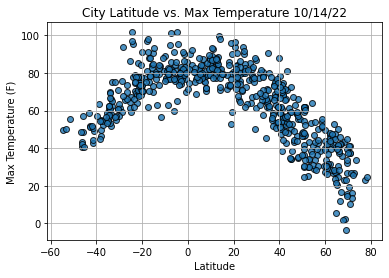

In [57]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

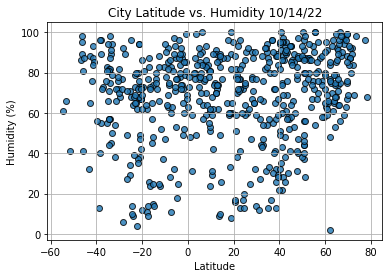

In [58]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

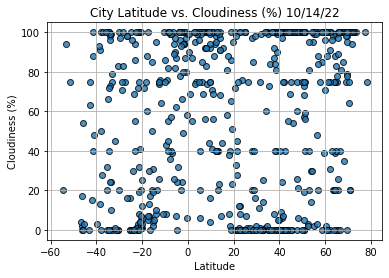

In [59]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

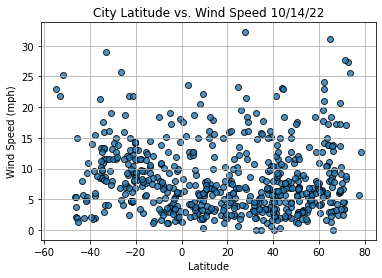

In [60]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [62]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [64]:
index13 = city_data_df.loc[13]
index13

City                    Inhambane
Country                        MZ
Date          2022-10-14 14:02:43
Lat                       -23.865
Lng                       35.3833
Max Temp                    77.94
Humidity                       64
Cloudiness                      0
Wind Speed                  12.12
Name: 13, dtype: object

In [66]:
# If we want to return a DataFrame with all data fitting the criteria, 
# for latitudes greater than or equal to 0
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Kolondieba,ML,2022-10-14 14:02:36,11.0882,-6.8926,92.48,42,56,2.91
2,Marawi,PH,2022-10-14 14:02:37,7.9986,124.2928,70.30,93,100,4.99
6,Guerrero Negro,MX,2022-10-14 14:02:38,27.9769,-114.0611,67.35,78,97,12.53
7,Sawakin,SD,2022-10-14 14:02:39,19.1059,37.3321,90.07,60,51,10.22
8,Butaritari,KI,2022-10-14 14:02:40,3.0707,172.7902,80.26,80,100,12.73


In [67]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

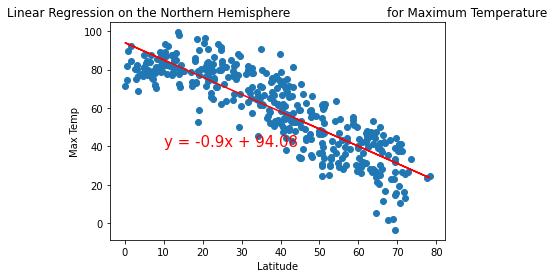

In [68]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

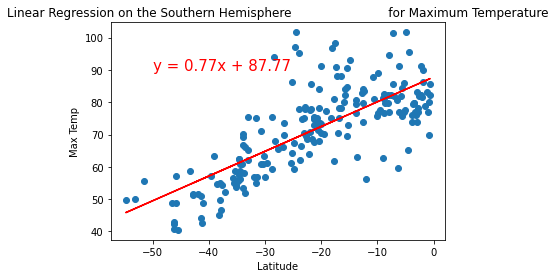

In [69]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

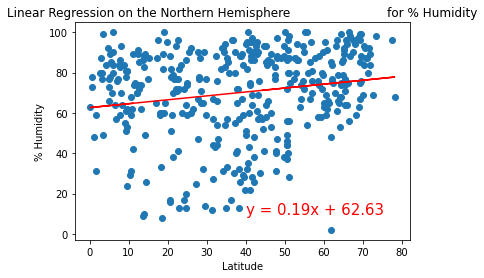

In [70]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

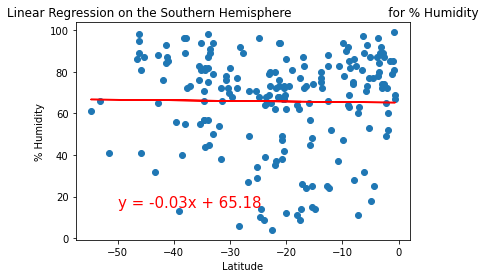

In [71]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

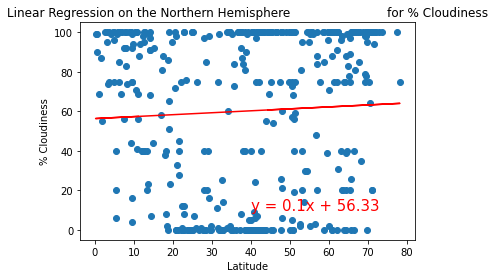

In [72]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

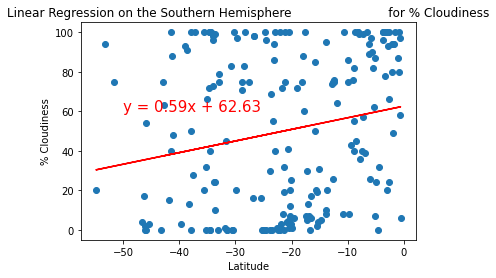

In [74]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

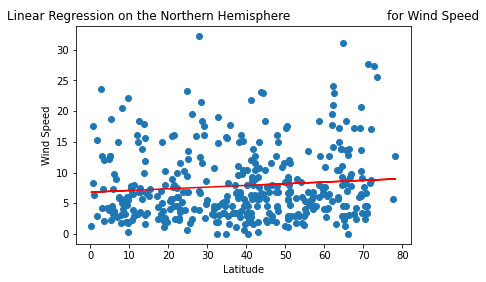

In [75]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

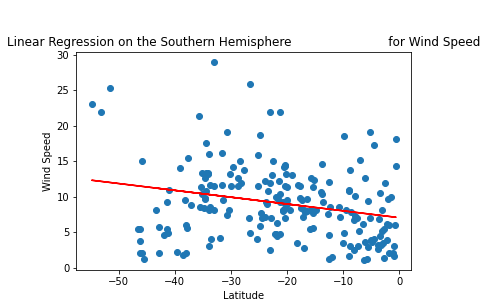

In [76]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))